<a href="https://colab.research.google.com/github/casualcomputer/accounting_fraud/blob/master/r_accounting_fraud_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("zeallot")
install.packages("dplyr")
install.packages("scales")
install.packages("stringr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
library(dplyr)
library(stringr)
library(scales)
library(zeallot)

dataset <- read.csv("https://raw.githubusercontent.com/casualcomputer/accounting_fraud/master/uscecchini28.csv")
data_dictionary <- read.csv("https://raw.githubusercontent.com/casualcomputer/accounting_fraud/master/get_data_dict.csv") #data dictionary: http://www.crsp.org/products/documentation/annual-data-industrial
str(dataset)
str(data_dictionary)

'data.frame':	146045 obs. of  51 variables:
 $ fyear         : int  1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 ...
 $ gvkey         : int  1009 1011 1017 1021 1028 1034 1036 1043 1045 1050 ...
 $ sich          : int  3460 4841 3812 3861 7385 2834 3440 3555 4512 9995 ...
 $ insbnk        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ understatement: int  0 0 0 0 0 0 0 0 0 0 ...
 $ option        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ p_aaer        : int  NA NA NA NA NA NA NA NA NA NA ...
 $ new_p_aaer    : int  NA NA NA NA NA NA NA NA NA NA ...
 $ misstate      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ act           : num  10.05 1.25 55.04 24.68 17.32 ...
 $ ap            : num  3.736 0.803 3.601 3.948 3.52 ...
 $ at            : num  32.34 7.78 118.12 34.59 27.54 ...
 $ ceq           : num  6.262 0.667 44.393 7.751 -12.142 ...
 $ che           : num  0.002 0.171 3.132 0.411 1.017 ...
 $ cogs          : num  30.63 1.12 107.34 31.21 32.66 ...
 $ csho          : num  2.53 3.56 3.88 4.75 6.74 ...
 $ dlc      

[1]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 31 31 31  1
 [26] 32  1 31  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [51]  1  1  1  1  1  1  1  1 14  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 [76]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
[101]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  1  1  1
[126]  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  1  1 14  1
[151]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
[176]  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 32 32 32  1 32
[201]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  1  1
[226]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
[251]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 51 51 11 11  0
[276]  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
[301]  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1 24  1  1  1  1  1  1  1  1  1
[326]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
[351]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
[376]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

In [4]:
#  change column names of "dataset", to reflect names of accounting variables
        colNames_dataset <- toupper(names(dataset))
        var_in_dict <-    data.frame("var"=toupper(colNames_dataset)) %>% 
                          left_join(data_dictionary, by=c("var"="New.CCM.Item.Name")) %>% 
                          filter(!is.na(Description)) %>% 
                          select(var,Description)  
        
        var_position <- c()
        for (i in var_in_dict$var){
          var_position <- c(var_position,which(colNames_dataset==i))
        }
        var_in_dict$position <- var_position
    
        
        for (i in 1:dim(var_in_dict)[1]){
          names(dataset)[var_in_dict[i,3]] <- var_in_dict[i,2]
        }
        names(dataset) <- gsub("\\\\","",names(dataset))
        colnames(dataset)
                    

[1] "fyear"                                            
 [2] "gvkey"                                            
 [3] "Standard Industrial Classification - Historical"  
 [4] "insbnk"                                           
 [5] "understatement"                                   
 [6] "option"                                           
 [7] "p_aaer"                                           
 [8] "new_p_aaer"                                       
 [9] "misstate"                                         
[10] "Current Assets - Total"                           
[11] "Accounts Payable - Trade"                         
[12] "Assets - Total"                                   
[13] "Common/Ordinary Equity - Total"                   
[14] "Cash and Short-Term Investments"                  
[15] "Cost of Goods Sold"                               
[16] "Common Shares Outstanding"                        
[17] "Debt in Current Liabilities - Total"              
[18] "Long-Term Debt/Issuance"                          
[19] "Long-Term Debt - Total"                           
[20] "Depreciation and Amortization"                    
[21] "Income Before Extraordinary Items"                
[22] "Inventories - Total"                              
[23] "Investment and Advances/Other"                    
[24] "Short-Term Investments - Total"                   
[25] "Current Liabilities - Total"                      
[26] "Liabilities - Total"                              
[27] "Net Income (Loss)"                                
[28] "\"Property, Plant and Equipment - Total (Gross)\""
[29] "Preferred/Preference Stock (Capital) - Total"     
[30] "Retained Earnings"                                
[31] "Receivables/Total"                                
[32] "Sales/Turnover (Net)"                             
[33] "Sale of Common and Preferred Stock"               
[34] "Income Taxes Payable"                             
[35] "Income Taxes - Total"                             
[36] "Interest and Related Expense - Total"             
[37] "prcc_f"                                           
[38] "dch_wc"                                           
[39] "ch_rsst"                                          
[40] "dch_rec"                                          
[41] "dch_inv"                                          
[42] "soft_assets"                                      
[43] "ch_cs"                                            
[44] "ch_cm"                                            
[45] "ch_roa"                                           
[46] "issue"                                            
[47] "bm"                                               
[48] "dpi"                                              
[49] "reoa"                                             
[50] "EBIT"                                             
[51] "ch_fcf"

In [5]:
 #number of companies, number of fraud companies
        all_companies <- unique(dataset$gvkey) #unique companies 
        fraud_companies <- unique((dataset[dataset$understatement==1,]$gvkey)) #unique companies that were labelled fraud
        cat("total number of companies: ", length(all_companies))
        cat("\nnumber of fraud companies: ", length(fraud_companies))
        cat("\nfraud companies: ", fraud_companies)
        cat("\n\n")
        

 #table: financial records labelled as fraud vs. financial records labelled as non-fraud (are these annual filings?! SEC filings?!)       
        cat("\nProportion of non-fraud vs. fraud annual statements")
        prop.table(table(dataset$understatement)) #fraud reporting (understatement=1) /all reporting
        cat("\n\n")
        
 #porportion of fraud companies, out of all companies      
        fraud_perc <- length(fraud_companies)/length(unique(dataset$gvkey)) #num. fraud companies/ all companies
        cat("Proportion of fraud companies: ", fraud_perc)
        cat("\n\n")
        
        cat("\nTotal number of annual statements: ", comma(nrow(dataset)))
        cat("\nTotal number of fraud statements: ", nrow(dataset[dataset$understatement==1,]))
        cat("\n")
 
 #table: proportion of financial records labelled as issues       
        cat("\n\nContigency Table for statements labelled 'Issues'")
        round(prop.table(table(dataset$issue)),2) #what is this? what "issue" are we talking about?
    
 #check variables with missing values
        missing_value_count <- data.frame(missing_value_count= apply(dataset, 2, function(x){sum(is.na(x))})) %>% 
                                    filter(missing_value_count>=1)  
          
        missing_value_count$missing_var <- row.names(missing_value_count)
        row.names(missing_value_count) <- NULL
        missing_value_count <- missing_value_count[,c(2,1)]
        missing_value_df <-   missing_value_count %>% 
                              arrange(missing_value_count) %>% #asc on number of missing values
                              mutate(missing_value_perc= percent(missing_value_count/nrow(dataset)), #label percentage of missing values
                                     missing_value_count =comma(missing_value_count)) #label number of missing values

        missing_value_df.new <- missing_value_df %>% 
                                left_join(data_dictionary, by=c("missing_var"= "Description")) %>% #add descriptions for missing values
                                select(c(4,1,2,3)) %>%  
                                mutate(New.CCM.Item.Name=tolower(New.CCM.Item.Name)) %>% 
                                rename(missing_var_orig_coding=New.CCM.Item.Name)
        missing_value_df.new
        cat("\n\n")
    
    #check if we are missing different years' data
        companies_with_missing_year <- dataset %>% 
                                       select(gvkey,fyear) %>% 
                                       group_by(gvkey) %>%
                                       mutate(report_range = max(fyear)-min(fyear)+1, #range of filings (assuming filing obligation every year...?!)
                                              count_reports= n(), #number of missed filings
                                              num_missing_year =report_range - count_reports, # number of missed filings 
                                              proportion_reports_missing =num_missing_year/report_range) %>% #proportion of missed filings
                                       distinct(gvkey,report_range,count_reports,num_missing_year,proportion_reports_missing) %>% 
                                       filter(num_missing_year>=1) %>% #get companies that have missed annual reports
                                       distinct(gvkey)
          
        num_company_with_missing_reports <- length(companies_with_missing_year$gvkey)
        cat("Number of companies with missing annual reports:", 
        comma(num_company_with_missing_reports)) #I wonder on which exchange most of these companies are listed?! 
        cat("\nTotal number of companies:", comma(length(all_companies)))       
        cat("\nProportion of companies with missing annual reports:", percent(num_company_with_missing_reports/length(all_companies)))  

total number of companies:  18444
number of fraud companies:  16
fraud companies:  5250 23288 8496 1278 13839 63859 3650 29001 30870 63951 10310 6497 141642 11982 62399 175982


Proportion of non-fraud vs. fraud annual statements


           0            1 
0.9998219727 0.0001780273 



Proportion of fraud companies:  0.0008674908


Total number of annual statements:  146,045
Total number of fraud statements:  26


Contigency Table for statements labelled 'Issues'


   0    1 
0.14 0.86 

missing_var_orig_coding,missing_var,missing_value_count,missing_value_perc
<chr>,<chr>,<chr>,<chr>
NA,bm,18.0,0.01232%
NA,reoa,591.0,0.40467%
NA,EBIT,591.0,0.40467%
NA,soft_assets,592.0,0.40535%
NA,dch_inv,"4,615.0",3.15998%
NA,dch_rec,"4,743.0",3.24763%
NA,dch_wc,"4,759.0",3.25858%
NA,ch_rsst,"4,851.0",3.32158%
NA,ch_fcf,"5,407.0",3.70228%




Number of companies with missing annual reports: 4,604
Total number of companies: 18,444
Proportion of companies with missing annual reports: 25%

In [23]:
# convert the columns to appropriate types 
        dataset.new <- dataset
        dataset.new$p_aaer <- NULL  #"Accounting and Auditing Enforcement Releases" usually come after allegations
        dataset.new$new_p_aaer <- NULL  #"Accounting and Auditing Enforcement Releases" usually come after allegations
        c(num.of.rows, num.of.cols) %<-% dim(dataset.new) #get dimensions of the data frame
    
        
# for each company, get the earliest and latest year for which a record was available. 
        min_year <- min(dataset.new$fyear)
        max_year <- max(dataset.new$fyear)
        num_years <- max_year-min_year +1
        ref_years_df <- data.frame(gvkey= rep(unique(dataset.new$gvkey),each=num_years),
                                   fyear = rep(min_year:max_year, times=length(unique(dataset.new$gvkey))))
        
        dataset.new.mod <-ref_years_df %>% 
                              left_join(dataset.new,by=c("gvkey"="gvkey","fyear"= "fyear")) %>% 
                              group_by(gvkey) %>% 
                              arrange(gvkey,fyear)
        
        min_max_lookup <- dataset.new.mod %>% 
                              filter(!is.na(understatement)) %>% 
                              group_by(gvkey) %>% 
                              mutate(max_year=max(fyear),
                                     min_year=min(fyear)) %>% 
                              select(gvkey,max_year,min_year) %>% 
                              distinct(gvkey,max_year,min_year)
        
       dataset.new.mod<-  dataset.new.mod %>% 
                              left_join(min_max_lookup,by=c("gvkey"="gvkey")) %>% 
                              mutate(ind_missing = case_when(fyear <min_year~"pre", 
                                                             fyear >max_year~ "post",
                                                             fyear>min_year&fyear<max_year~"during",
                                                             TRUE~"N/A"))
       dataset.new.mod <- as.data.frame(dataset.new.mod)
       #dataset.new.mod[,3] <- data.frame() #replace industry codes with text NA
              

#define "pre", "post" and "during" NA's (for numerical values)
       dataset.new.mod[dataset.new.mod$ind_missing=="pre",4:49] <- -100000000000 #before first file
       dataset.new.mod[dataset.new.mod$ind_missing=="post",4:49] <- 100000000000 #between first file and last file 
       dataset.new.mod[dataset.new.mod$ind_missing=="during",4:49] <- 100000000000 #after last file 
       
       cleaned_data <- as.data.frame(dataset.new.mod)
       cleaned_data$max_year <- NULL      
       cleaned_data$min_year <- NULL 

       
       #str(dataset.new.mod)
       #summary(dataset.new.mod)
       
       #replace numeric values with 
        nums <- unlist(lapply(cleaned_data, is.numeric))  
        cleaned_data[ , nums][is.na(cleaned_data[ , nums])] <- 100000000000 #replace NA's of numeric columns
          
        # View(cleaned_data)
        #str(cleaned_data)
                 
#fraud data (how are splits represented)                    
        fraud.df <- dataset.new.mod %>% filter(gvkey %in% fraud_companies)
        fraud.industry <- fraud.df %>% 
                            group_by(gvkey) %>% 
                            summarise(num_industries = n_distinct(sich),
                                      filing_perc=sum(abs(understatement)<=1)/(max(max_year)-min(min_year)+1)) %>% 
                            mutate(filing_perc=percent(filing_perc))
        fraud.industry
        print(paste("unique fraud companies",unique(fraud.df$gvkey))) #unique companies 
        print(paste("unique fraud sectors", unique(fraud.df$sich))) #unique fraud sectors (check SIC code here: https://www.insurancexdate.com/sic.php)
        

,gvkey,num_industries,filing_perc
,<int>,<int>,<chr>
1,1278,3,25.00%
2,3650,1,8.00%
3,5250,5,8.00%
4,6497,2,8.00%
5,8496,2,40.00%
6,10310,3,22.22%
7,11982,2,12.50%
8,13839,3,8.00%
9,23288,4,8.70%


 [1] "unique fraud companies 1278"   "unique fraud companies 3650"  
 [3] "unique fraud companies 5250"   "unique fraud companies 6497"  
 [5] "unique fraud companies 8496"   "unique fraud companies 10310" 
 [7] "unique fraud companies 11982"  "unique fraud companies 13839" 
 [9] "unique fraud companies 23288"  "unique fraud companies 29001" 
[11] "unique fraud companies 30870"  "unique fraud companies 62399" 
[13] "unique fraud companies 63859"  "unique fraud companies 63951" 
[15] "unique fraud companies 141642" "unique fraud companies 175982"
 [1] "unique fraud sectors NA"   "unique fraud sectors 3634"
 [3] "unique fraud sectors 2390" "unique fraud sectors 3510"
 [5] "unique fraud sectors 2800" "unique fraud sectors 2890"
 [7] "unique fraud sectors 3081" "unique fraud sectors 2810"
 [9] "unique fraud sectors 3651" "unique fraud sectors 5912"
[11] "unique fraud sectors 3812" "unique fraud sectors 8093"
[13] "unique fraud sectors 2860" "unique fraud sectors 2836"
[15] "unique fraud se

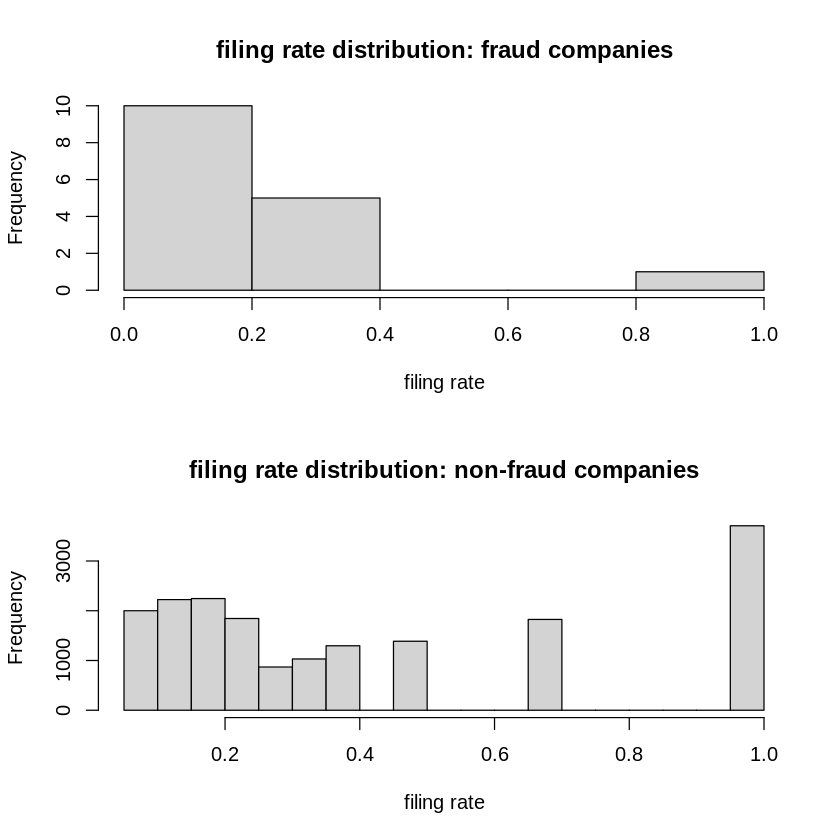

In [22]:
#plot filing rate of fraud company vs. non-fraud companies
filing_compliance <- dataset.new.mod %>% 
                            mutate(duration=max_year-min_year+1,
                                   has.filed= case_when(abs(understatement)<=1~1,
                                                        TRUE~0)) %>% 
                            select(gvkey,has.filed,duration) %>% 
                            group_by(gvkey) %>%
                            mutate(filing_count=sum(has.filed),
                                   duration=max(duration)) %>% 
                            select(-has.filed)

filing_compliance <- filing_compliance %>% 
                          mutate(filing_rate =filing_count/duration ) %>% 
                          arrange(filing_rate) %>% 
                          distinct_all()

par(mfrow=c(2,1))
hist(filing_compliance[filing_compliance$gvkey %in% fraud_companies,]$filing_rate,
     main="filing rate distribution: fraud companies",xlab ="filing rate")
hist(filing_compliance[!filing_compliance$gvkey %in% fraud_companies,]$filing_rate,
     main="filing rate distribution: non-fraud companies",xlab ="filing rate")

In [ ]:
# RNN 